# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Stochastic Gradient Descent

## Import libraries

In [3]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

from stochastic_gradient_descent.StochasticGradientDescent import StochasticGradientDescent
from stochastic_gradient_descent.TrainingDataGenerator import TrainingDataGenerator

## Import data points generated

Paste the report number copied from the notebook:
**Generate Artificial Data Points** [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dayan3847/machine_learning/blob/master/stochastic_gradient_descent/colab/generate_artificial_data_points.ipynb)

In [1]:
report_number: str = '20230514141100608132'

In [4]:
data_points: np.array = np.loadtxt(f'reports/{report_number}/data_points.csv', delimiter=',').T

In [9]:
function_str: str = open(f'reports/{report_number}/data_points_base_function.txt', 'r').read()
function: sp.Expr = sp.sympify(function_str)
print('\033[32m' + 'Imported base function:' + '\033[0m')
function

Imported base function:


sin(2*pi*x)

## Plot Data Points

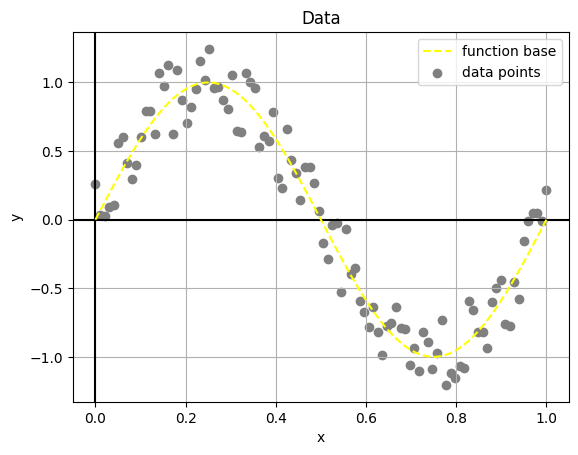

In [13]:
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(color='black')
plt.axhline(color='black')
# Function Base
x_ = np.linspace(0, 1, 100)
y_ = [function.subs('x', x_i) for x_i in x_]
plt.plot(x_, y_, label='function base', color='yellow', linestyle='--')
# Data Points
plt.scatter(data_points[0], data_points[1], color='gray', label='data points')
plt.legend()
plt.grid()
plt.show()

## Stochastic Gradient Descent Class

In [14]:
sgd = StochasticGradientDescent(data_points, d=10, a=.1, iterations_count=1000)

### Training

In [15]:
print('\033[92m' + 'training...' + '\033[0m')
sgd.run()
print('\033[92m' + 'training finished' + '\033[0m')

training...
training finished


### Save history report

In [17]:
print('\033[92m' + 'saving...' + '\033[0m')
pd.DataFrame(sgd.history).to_csv(f'reports/{report_number}/history.csv', index=False)
print('\033[92m' + 'saved' + '\033[0m')

saving...
saved


### Print Results

In [16]:
# print_repo
print('REPORT')
print('Alpha:', sgd.a)
print('Iterations:', sgd.iterations_count)
print('Polynomial Degree:', sgd.d)
print('Initial Parameters:', sgd.history['polynomial'][0])
print('Final Parameters:', sgd.history['polynomial'][-1])
print('Final Error:', sgd.history['error'][-1])

REPORT
Alpha: 0.1
Iterations: 1000
Polynomial Degree: 10
Initial Parameters: -0.4615565816394869*x**10 - 0.3252146330672381*x**9 - 0.06340001679337404*x**8 + 0.026563344756167062*x**7 - 0.34403939278003526*x**6 - 0.4208839422692403*x**5 + 0.4594460493335454*x**4 + 0.3357366205392712*x**3 + 0.17936317572199212*x**2 - 0.34402537195070837*x + 0.06777089597724562
Final Parameters: -1.4793278198864594*x**10 - 0.45804550653468684*x**9 + 0.8326184123292363*x**8 + 1.9829956688585568*x**7 + 2.4384511659425376*x**6 + 2.415187178664004*x**5 + 1.6478263314179729*x**4 - 2.874027965136433*x**3 - 8.493956767521228*x**2 + 3.782549662811641*x + 0.41801651432238396
Final Error: 2.344178501795904
